In [532]:
import pandas as pd
import re 
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import os # accessing directory structure


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir('Desktop\csvfiles'))


['btcprices.csv', 'combinedtweets.csv', 'New folder']


In [533]:
notclean = pd.read_csv(r'C:\Users\maghh\Desktop\csvfiles\combinedtweets.csv', delimiter=',', error_bad_lines=False,engine = 'python',header = None)

In [534]:
notclean.head()

,0,1,2
0,0,2013-11-29 23:59:47+00:00,Bitcoin Sports Betting Site http://www.contrac...
1,1,2013-11-29 23:59:31+00:00,"The latest Bitcoin Price Index is 1,060.96 USD"
2,2,2013-11-29 23:59:20+00:00,"LIVE: Profit = $40,709.13 (14.51 %). BUY B269...."
3,3,2013-11-29 23:59:08+00:00,Tiny island looking to mint physical Bitcoin h...
4,4,2013-11-29 23:59:02+00:00,#BitCoin Marketvalue http://MtGox.com H: 1242....


In [535]:
#Pre-processing
notclean.columns =['NaN','dt','text']

In [536]:
notclean =notclean.drop(['NaN'], axis=1)

In [537]:
notclean.head()

,dt,text
0,2013-11-29 23:59:47+00:00,Bitcoin Sports Betting Site http://www.contrac...
1,2013-11-29 23:59:31+00:00,"The latest Bitcoin Price Index is 1,060.96 USD"
2,2013-11-29 23:59:20+00:00,"LIVE: Profit = $40,709.13 (14.51 %). BUY B269...."
3,2013-11-29 23:59:08+00:00,Tiny island looking to mint physical Bitcoin h...
4,2013-11-29 23:59:02+00:00,#BitCoin Marketvalue http://MtGox.com H: 1242....


In [548]:
notclean['dt'] = pd.to_datetime(notclean['dt'], errors='coerce')

In [549]:
notclean['Datetime'] = notclean['dt'].dt.floor('h')

In [550]:
notclean.head()

,dt,text,Datetime
0,2013-11-29 23:59:47+00:00,Bitcoin Sports Betting Site http://www.contrac...,2013-11-29 23:00:00+00:00
1,2013-11-29 23:59:31+00:00,"The latest Bitcoin Price Index is 1,060.96 USD",2013-11-29 23:00:00+00:00
2,2013-11-29 23:59:20+00:00,"LIVE: Profit = $40,709.13 (14.51 %). BUY B269....",2013-11-29 23:00:00+00:00
3,2013-11-29 23:59:08+00:00,Tiny island looking to mint physical Bitcoin h...,2013-11-29 23:00:00+00:00
4,2013-11-29 23:59:02+00:00,#BitCoin Marketvalue http://MtGox.com H: 1242....,2013-11-29 23:00:00+00:00


In [551]:
vdf = notclean.groupby(pd.Grouper(key='dt',freq='H')).size().reset_index(name='tweet_vol')

In [552]:
vdf

,dt,tweet_vol
0,2013-11-29 20:00:00+00:00,572
1,2013-11-29 21:00:00+00:00,752
2,2013-11-29 22:00:00+00:00,852
3,2013-11-29 23:00:00+00:00,824
4,2013-11-30 00:00:00+00:00,0
...,...,...
55127,2020-03-14 19:00:00+00:00,0
55128,2020-03-14 20:00:00+00:00,224
55129,2020-03-14 21:00:00+00:00,939
55130,2020-03-14 22:00:00+00:00,907


In [553]:
vdf.index = pd.to_datetime(vdf.index)
vdf=vdf.set_index('dt')

In [554]:
vdf.head()

,tweet_vol
dt,
2013-11-29 20:00:00+00:00,572
2013-11-29 21:00:00+00:00,752
2013-11-29 22:00:00+00:00,852
2013-11-29 23:00:00+00:00,824
2013-11-30 00:00:00+00:00,0


In [555]:
notclean.index = pd.to_datetime(notclean.index)
vdf['tweet_vol'] =vdf['tweet_vol'].astype(float)

In [556]:
notclean.head()

,dt,text,Datetime
1970-01-01 00:00:00.000000000,2013-11-29 23:59:47+00:00,Bitcoin Sports Betting Site http://www.contrac...,2013-11-29 23:00:00+00:00
1970-01-01 00:00:00.000000001,2013-11-29 23:59:31+00:00,"The latest Bitcoin Price Index is 1,060.96 USD",2013-11-29 23:00:00+00:00
1970-01-01 00:00:00.000000002,2013-11-29 23:59:20+00:00,"LIVE: Profit = $40,709.13 (14.51 %). BUY B269....",2013-11-29 23:00:00+00:00
1970-01-01 00:00:00.000000003,2013-11-29 23:59:08+00:00,Tiny island looking to mint physical Bitcoin h...,2013-11-29 23:00:00+00:00
1970-01-01 00:00:00.000000004,2013-11-29 23:59:02+00:00,#BitCoin Marketvalue http://MtGox.com H: 1242....,2013-11-29 23:00:00+00:00


In [557]:
df = notclean.groupby('Datetime').agg(lambda x: x.mean())
df['Tweet_vol'] = vdf['tweet_vol']
df = df.drop(df.index[0])
df

,dt,Tweet_vol
Datetime,,
2013-11-29 21:00:00+00:00,2013-11-29 21:28:30.263296+00:00,752.0
2013-11-29 22:00:00+00:00,2013-11-29 22:29:11.761736704+00:00,852.0
2013-11-29 23:00:00+00:00,2013-11-29 23:25:15.527912960+00:00,824.0
2013-11-30 18:00:00+00:00,2013-11-30 18:48:13.094059264+00:00,202.0
2013-11-30 19:00:00+00:00,2013-11-30 19:27:52.529109760+00:00,584.0
2013-11-30 20:00:00+00:00,2013-11-30 20:27:37.780800+00:00,625.0
2013-11-30 21:00:00+00:00,2013-11-30 21:28:16.051094016+00:00,548.0
2013-11-30 22:00:00+00:00,2013-11-30 22:29:29.949086464+00:00,491.0
2013-11-30 23:00:00+00:00,2013-11-30 23:27:33.243636224+00:00,550.0


In [558]:
btcDF = pd.read_csv(r'C:\Users\maghh\Desktop\csvfiles\btcprices.csv', error_bad_lines=False,engine = 'python')

In [559]:
btcDF['Datetime'] = pd.to_datetime(btcDF['Datetime'],  format='%Y-%m-%d %H-%p')
btcDF = btcDF.set_index(pd.DatetimeIndex(btcDF['Datetime']))

In [560]:
btcDF.head()

,Datetime,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Datetime,,,,,,,,
2013-12-01 11:00:00,2013-12-01 11:00:00,BTCUSD,2595.98,2611.45,2591.32,2602.00,580.95,1511685.24
2013-12-01 10:00:00,2013-12-01 10:00:00,BTCUSD,2582.36,2596.00,2579.41,2595.98,328.94,852406.83
2013-12-01 09:00:00,2013-12-01 09:00:00,BTCUSD,2579.09,2590.05,2574.71,2582.36,442.23,1143030.49
2013-12-01 08:00:00,2013-12-01 08:00:00,BTCUSD,2566.51,2586.99,2563.02,2579.09,216.02,556118.78
2013-11-30 11:00:00,2013-11-30 11:00:00,BTCUSD,2554.40,2557.15,2541.90,2542.41,262.95,670974.20


In [561]:
btcDF = btcDF.drop(['Datetime'], axis=1)

In [562]:
btcDF.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Datetime,,,,,,,
2013-12-01 11:00:00,BTCUSD,2595.98,2611.45,2591.32,2602.00,580.95,1511685.24
2013-12-01 10:00:00,BTCUSD,2582.36,2596.00,2579.41,2595.98,328.94,852406.83
2013-12-01 09:00:00,BTCUSD,2579.09,2590.05,2574.71,2582.36,442.23,1143030.49
2013-12-01 08:00:00,BTCUSD,2566.51,2586.99,2563.02,2579.09,216.02,556118.78
2013-11-30 11:00:00,BTCUSD,2554.40,2557.15,2541.90,2542.41,262.95,670974.20


In [563]:
btcDF =btcDF.drop(['Symbol'], axis=1)

In [564]:
btcDF

,Open,High,Low,Close,Volume BTC,Volume USD
Datetime,,,,,,
2013-12-01 11:00:00,2595.98,2611.45,2591.32,2602.00,580.95,1511685.24
2013-12-01 10:00:00,2582.36,2596.00,2579.41,2595.98,328.94,852406.83
2013-12-01 09:00:00,2579.09,2590.05,2574.71,2582.36,442.23,1143030.49
2013-12-01 08:00:00,2566.51,2586.99,2563.02,2579.09,216.02,556118.78
2013-11-30 11:00:00,2554.40,2557.15,2541.90,2542.41,262.95,670974.20
2013-11-30 10:00:00,2559.98,2573.84,2552.01,2554.40,387.05,992687.47
2013-11-30 09:00:00,2556.02,2559.99,2550.00,2559.98,386.00,986807.45
2013-11-30 08:00:00,2547.43,2559.12,2547.16,2556.02,416.77,1063723.97
2013-11-30 07:00:00,2528.80,2548.02,2528.10,2547.43,332.44,843361.36


In [568]:
tz_aware.tz_localize(None)
DatetimeIndex(['Datetime'], dtype='datetime64[ns]', freq='D')

NameError: name 'tz_aware' is not defined

In [567]:
horizontal_stack = pd.concat([df, btcDF], axis=1)

TypeError: Cannot join tz-naive with tz-aware DatetimeIndex

In [507]:
df.describe()

,Tweet_vol
count,26.000000
mean,1016.461538
std,820.618168
min,202.000000
25%,558.500000
50%,838.000000
75%,946.500000
max,3000.000000


In [508]:
btcDF.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,26.000000,26.000000,26.000000,26.000000,26.000000,2.600000e+01
mean,6691.243077,6760.856923,6590.954231,6667.566923,1648.781923,1.219147e+07
std,6461.135735,6534.786584,6431.523323,6494.005771,2764.614772,1.720689e+07
min,2504.090000,2525.000000,2495.560000,2516.660000,216.020000,5.561188e+05
25%,2554.805000,2559.337500,2547.870000,2554.805000,423.135000,1.083379e+06
50%,3929.305000,3940.460000,3617.660000,3729.550000,806.745000,3.425828e+06
75%,5648.885000,5767.500000,5488.427500,5620.002500,1711.732500,1.991906e+07
max,19690.000000,19797.000000,19592.100000,19690.000000,14339.110000,7.311749e+07


In [514]:
def corr(df, btcDF):
    n = len(df)
    v1, v2 = df.values, btcDF.values
    sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    stds = np.multiply.outer(v2.std(0), v1.std(0))
    return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n,
                        df2.columns, df1.columns)

corr(df, btcDF)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

IndexError: index 2 is out of bounds for axis 1 with size 2

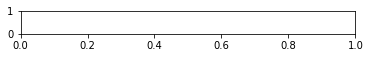

In [506]:
values1 = df.values
values2 = btcDF.values
groupdf = [0,1,2]
groupbtc = [0,1,2,3,4,5,6]
i =1  
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1,i)
    pyplot.plot(values1[:,groupdf])
    pyplotplot(values2[: ,groupbtc])
    pyplot.title(Final_df.columns[group], y=.5, loc='right')
    i += 1
pyplot.show()